In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import statistics
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
import os

In [2]:
housing_df = pd.read_csv('house_train_raw.csv')

# Reviso la cantidad y con qué columnas cuento

In [3]:
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Realizo EDA sobre columnas que elijo para mi modelo como 'x'

In [4]:
X = housing_df[['ExterCond','SaleCondition','RoofMatl','GarageArea','LotArea','YearBuilt','KitchenAbvGr','BedroomAbvGr','OverallCond','OverallQual','FullBath','TotRmsAbvGrd','2ndFlrSF','1stFlrSF','MSSubClass','Neighborhood']]

# Variables Categoricas

In [5]:
# Trabajo con variables catégoricas en primera instancia. Las cuales son 'ExterCond', 'SaleCondition', 'RoofMatl' y 'Neighborhood'

In [6]:
X['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [7]:
X['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [8]:
X['ExterCond'] = X['ExterCond'].map({'TA': 1, 'Gd': 2, 'Fa': 3, 'Po': 4, 'Ex': 5})

In [9]:
X['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [10]:
X['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [11]:
X['SaleCondition'] = X['SaleCondition'].map({'Normal': 1, 'Abnorml': 2, 'Partial': 3, 'AdjLand': 4, 'Alloca': 5, 'Family': 6})

In [12]:
# En 'RoofMatl', me quedo con solo dos campos para reducir dimensionalidad. 

In [13]:
listado_roof = X['RoofMatl'].value_counts()
roof_material_menos_15 = listado_roof[listado_roof<=15]
X['RoofMatl'] = X['RoofMatl'].apply(lambda x: 2 if x in roof_material_menos_15 else 1)

In [14]:
# En 'Neighborhood' creo dummies para poder utilizar en mi modelo y mejorar la perfomance. 

In [15]:
len(X['Neighborhood'].unique())

25

In [16]:
dummies = pd.get_dummies(X['Neighborhood'])

In [17]:
X_new = pd.concat([X,dummies],axis='columns')

In [18]:
X_new.drop(['Neighborhood'],axis='columns',inplace=True)

## Variables Numericas

In [19]:
X_new['GarageArea'].value_counts()

0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: GarageArea, Length: 441, dtype: int64

In [20]:
X_new['LotArea'].value_counts(ascending=False)

7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64

In [21]:
X_new['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [22]:
X_new['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [23]:
X_new['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [24]:
X_new['FullBath'].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [25]:
X_new['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [26]:
X_new['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [27]:
X_new['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

In [28]:
X_new['2ndFlrSF'].describe()

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

In [29]:
X_new['1stFlrSF']

0        856
1       1262
2        920
3        961
4       1145
        ... 
1455     953
1456    2073
1457    1188
1458    1078
1459    1256
Name: 1stFlrSF, Length: 1460, dtype: int64

In [30]:
X_new[X_new['1stFlrSF'] <= 1000]

,ExterCond,SaleCondition,RoofMatl,GarageArea,LotArea,YearBuilt,KitchenAbvGr,BedroomAbvGr,OverallCond,OverallQual,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,1,1,1,548,8450,2003,1,3,5,7,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,608,11250,2001,1,3,5,7,...,0,0,0,0,0,0,0,0,0,0
3,1,2,1,642,9550,1915,1,3,5,7,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,480,14115,1993,1,1,5,5,...,0,0,0,0,0,0,0,0,0,0
12,1,1,1,352,12968,1962,1,2,6,5,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,1,1,1,240,8400,1966,1,3,5,6,...,0,0,0,0,1,0,0,0,0,0
1448,1,1,1,384,11767,1910,1,2,7,4,...,0,0,0,0,0,0,0,0,0,0
1449,1,2,1,0,1533,1970,1,1,7,5,...,0,0,0,0,0,0,0,0,0,0
1450,1,1,1,0,9000,1974,2,4,5,5,...,0,0,0,0,0,0,0,0,0,0


## Definicion de Y

In [31]:
y = housing_df['SalePrice']

### Visualización gráfica de modelos y metricas - RMSLE & R2

>1, train: 0.115, test: 0.172
>2, train: 0.092, test: 0.161
>3, train: 0.077, test: 0.158
>4, train: 0.072, test: 0.156
>5, train: 0.069, test: 0.151
>6, train: 0.068, test: 0.153
>7, train: 0.067, test: 0.150
>8, train: 0.066, test: 0.147
>9, train: 0.066, test: 0.147
>10, train: 0.066, test: 0.149
>11, train: 0.066, test: 0.148
>12, train: 0.065, test: 0.152
>13, train: 0.065, test: 0.146
>14, train: 0.063, test: 0.147
>15, train: 0.066, test: 0.147
>16, train: 0.064, test: 0.145
>17, train: 0.066, test: 0.146
>18, train: 0.066, test: 0.148
>19, train: 0.065, test: 0.148


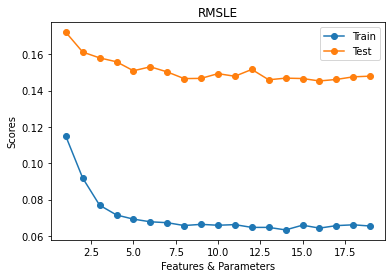

In [43]:
# Utilizo este método para grafica y analiticamente visualizar los RMSLE
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
# Defino listas para obtener score tanto de test como de train
train_scores, test_scores = list(), list()
# Utilizo lista para recorrer y jugar con los parámetros para ver cuál me da mejor score para mi métrica
values = [i for i in range(1,20)]
# Evaluo opciones para distintos modelos
for i in values:
	# Seteo el modelo
	model = RandomForestRegressor(max_depth=16,max_features=i)
	# Hago un fit para mi modelo
	model.fit(X_train, y_train)
	# Evalua sobre el train set
	train_yhat = model.predict(X_train)
	train_acc = mean_squared_log_error(y_train, train_yhat)**(0.5)
	train_scores.append(train_acc)
	# Evalua sobre el test 
	test_yhat = model.predict(X_test)
	test_acc = mean_squared_log_error(y_test, test_yhat)**(0.5)
	test_scores.append(test_acc)
	# Reflejamos el 
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# Gráfico de train y test relacionado a los RMSLE
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.title("RMSLE")
pyplot.xlabel("Features & Parameters")
pyplot.ylabel("Scores")
pyplot.legend()
pyplot.show()

>1, train: 0.944, test: 0.854
>2, train: 0.962, test: 0.870
>3, train: 0.972, test: 0.881
>4, train: 0.974, test: 0.880
>5, train: 0.978, test: 0.887
>6, train: 0.977, test: 0.885
>7, train: 0.976, test: 0.886
>8, train: 0.977, test: 0.878
>9, train: 0.977, test: 0.885
>10, train: 0.979, test: 0.887
>11, train: 0.978, test: 0.885
>12, train: 0.978, test: 0.887
>13, train: 0.979, test: 0.888
>14, train: 0.978, test: 0.887
>15, train: 0.979, test: 0.885
>16, train: 0.979, test: 0.885
>17, train: 0.980, test: 0.879
>18, train: 0.979, test: 0.881
>19, train: 0.980, test: 0.885


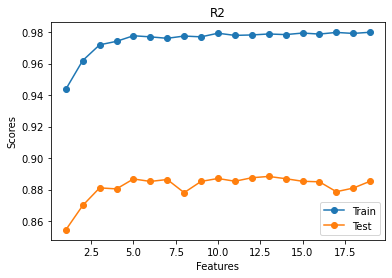

In [47]:
# Utilizo este método para grafica y analiticamente visualizar los r2 scores
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
# Defino listas para obtener score tanto de test como de train
train_scores, test_scores = list(), list()
# Utilizo lista para recorrer y jugar con los parámetros para ver cuál me da mejor R2
values = [i for i in range(1,20)]
# Evaluo opciones para distintos modelos
for i in values:
	# Seteo el modelo
	model = RandomForestRegressor(max_depth=16,max_features=i)
	# Hago un fit para mi modelo
	model.fit(X_train, y_train)
	# Evalua sobre el train set
	train_yhat = model.predict(X_train)
	train_acc = r2_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# Evalua sobre el test 
	test_yhat = model.predict(X_test)
	test_acc = r2_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# Reflejamos el 
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# Gráfico de train y test relacionado a los R2
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.title("R2")
pyplot.xlabel("Features")
pyplot.ylabel("Scores")
pyplot.legend()
pyplot.show()

***

***

## Ejecución del modelo - RandomForestRegressor

In [142]:
#Separo mi modelo en train and test, en un 0.8 y 0.2 respectivamente

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2)

In [33]:
# Creo mi modelo a utilizar y lo pongo a entrenar

In [34]:
modelo = RandomForestRegressor(max_depth=16,max_features=15)

In [35]:
modelo.fit(X_train,y_train)

RandomForestRegressor(max_depth=16, max_features=15)

In [36]:
# Chequeo scores de train y de test

In [37]:
modelo.score(X_train,y_train)

0.9769959398388213

In [38]:
modelo.score(X_test,y_test)

0.8968778386581304

In [39]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
lista_promedio = cross_val_score(modelo, X_new, y, cv=cv)
promedio = statistics.mean(lista_promedio)
print(lista_promedio, promedio)

[0.82628052 0.85498124 0.83495497 0.83464622 0.84296889] 0.8387663690240617


## METRICA SOLICITADA - RMSLE

In [40]:
y_predict = modelo.predict(X_test)
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, y_predict)**(0.5)

0.13942716496274601

## Traspaso de Predicciones a 'houses_test.csv'

In [48]:
housing_test = pd.read_csv(r"C:\Users\usuario\Desktop\Proyects\Proyecto_ML\Hackathon\Housing Dreams\houses_test_raw.csv")

# Réplica de mi modelo de ML (Selección de columnas)

In [49]:
X_new_test = housing_test[['ExterCond','SaleCondition','RoofMatl','GarageArea','LotArea','YearBuilt','OverallCond','OverallQual','FullBath','KitchenAbvGr','BedroomAbvGr','TotRmsAbvGrd','2ndFlrSF','1stFlrSF','MSSubClass','Neighborhood']]

In [50]:
X_new_test['ExterCond'] = X_new_test['ExterCond'].map({'TA': 1, 'Gd': 2, 'Fa': 3, 'Po': 4, 'Ex': 5})

In [51]:
X_new_test['SaleCondition'] = X_new_test['SaleCondition'].map({'Normal': 1, 'Abnorml': 2, 'Partial': 3, 'AdjLand': 4, 'Alloca': 5, 'Family': 6})

In [52]:
listado_roof = X_new_test['RoofMatl'].value_counts()
roof_material_menos_15 = listado_roof[listado_roof<=15]
X_new_test['RoofMatl'] = X_new_test['RoofMatl'].apply(lambda x: 2 if x in roof_material_menos_15 else 1)

In [53]:
dummies_new = pd.get_dummies(X_new_test['Neighborhood'])

In [54]:
X_10 = pd.concat([X_new_test,dummies_new],axis='columns')

In [55]:
X_10.drop(['Neighborhood'],axis='columns',inplace=True)

In [56]:
X_10.fillna(X_10['GarageArea'].mean(),inplace=True)

***

## Implementación de mi modelo en archivo 'test', creo archivo .csv. 

In [57]:
directorio = os.listdir(r"C:\Users\usuario\Desktop\ML\Proyecto_ML")
if len(directorio) == 0:
    y_p_test = modelo.predict(X_10)
    df = pd.DataFrame({'ID': housing_test['Id'], 'Pred': y_p_test})
    df.to_csv(r"C:\Users\usuario\Desktop\ML\Proyecto_ML\pred_test.csv",index=False)
else:
    print('CSV file has already been created')

CSV file has already been created
